In [2]:
from collections import deque

def solve_maze(maze, start, exit):
    queue = deque()
    visited = set()
    parent = {}

    queue.append(start)
    visited.add(start)

    while queue:
        current = queue.popleft()

        if current == exit:
            # Path found, backtrack to get the path
            path = []
            while current != start:
                path.append(current)
                current = parent[current]
            path.append(start)
            path.reverse()
            return path

        # Check adjacent nodes
        for action in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            next_node = (current[0] + action[0], current[1] + action[1])
            if next_node in maze and next_node not in visited:
                queue.append(next_node)
                visited.add(next_node)
                parent[next_node] = current

    # No path found
    return None

# Example usage
maze = {(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)}
start = (0, 0)
exit = (3, 3)

path = solve_maze(maze, start, exit)
if path:
    print("Path found:", path)
else:
    print("No path found")


Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)]


In [ ]:
# dfs

def dfs(visited,graph,node):
  print(node , end=" ")
  visited.add(node)

  for neighbor in graph[node]:
    if neighbor not in visited:
      dfs(visited,graph,neighbor)


graph = {
    'A':['B','C'],
    'B':['D','E'],
    'C':['F'],
    'D':[],
    'E':['F'],
    'F':[]
}

visited = set()
dfs(visited,graph,'B')

In [ ]:
from collections import deque

def bfs(graph,start):
  visited = set()
  queue = deque([start])
  visited.add(start)

  while queue:
    node = queue.popleft()
    print(node , end=" ")

    for neighbor in graph[node]:
      if neighbor not in visited:
        queue.append(neighbor)
        visited.add(neighbor)

graph = {
    0: [1, 2],
    1: [2],
    2: [0, 3],
    3: []
}

bfs(graph, 0)

In [ ]:
#Alpha Beta Pruning
#Tic-Tac-Toe Game


def minimax_alpha_beta(board, depth, alpha, beta, maximizing_player):
    # Check if the game is over or the maximum depth is reached
    if depth == 0 or game_over(board):
        return evaluate(board)

    if maximizing_player:
        max_eval = float('-inf')
        for move in available_moves(board):
            board.make_move(move, 'X')
            eval = minimax_alpha_beta(board, depth - 1, alpha, beta, False)
            board.undo_move(move)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = float('inf')
        for move in available_moves(board):
            board.make_move(move, 'O')
            eval = minimax_alpha_beta(board, depth - 1, alpha, beta, True)
            board.undo_move(move)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval

# Example usage:
initial_board = [[' ', ' ', ' '],
                 [' ', ' ', ' '],
                 [' ', ' ', ' ']]

alpha = float('-inf')
beta = float('inf')
maximizing_player = True
depth = 3

best_value = minimax_alpha_beta(initial_board, depth, alpha, beta,
                                maximizing_player)
print("Best value:", best_value)


In [ ]:
Task 2

     Range  BFS Time  DFS Time
0     1000  0.002017  0.001924
1    40000  0.001159  0.001555
2    80000  0.001007  0.000139
3   200000  0.001083  0.001696
4  1000000  0.001377  0.000432


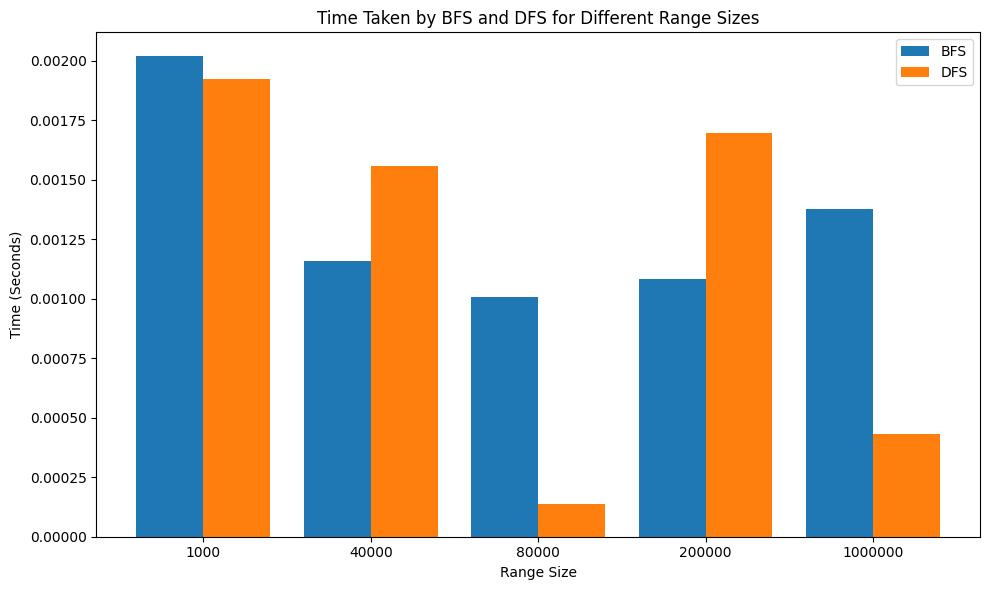

In [4]:
import random
import time
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate random unique numbers within a specified range
def generate_unique_numbers(range_size, total_numbers):
    numbers = set()
    while len(numbers) < total_numbers:
        numbers.add(random.randint(1, range_size))
    return list(numbers)

# Function to build a binary tree from a list of numbers
def build_tree(lst):
    tree = {}
    for num in lst:
        if not tree:  # If the tree is empty, create the root node
            tree[num] = {'left': None, 'right': None}
        else:
            current = tree
            while True:
                if num < list(current.keys())[0]:  # If the number is smaller, traverse left
                    if current[list(current.keys())[0]]['left'] is None:
                        current[list(current.keys())[0]]['left'] = {num: {'left': None, 'right': None}}
                        break
                    else:
                        current = current[list(current.keys())[0]]['left']
                else:  # If the number is larger, traverse right
                    if current[list(current.keys())[0]]['right'] is None:
                        current[list(current.keys())[0]]['right'] = {num: {'left': None, 'right': None}}
                        break
                    else:
                        current = current[list(current.keys())[0]]['right']
    return tree

# Breadth First Search algorithm to find a goal value in a binary tree
def bfs(tree, goal):
    start_time = time.time()
    queue = deque([(tree, [])])  # Initialize a queue with the root node and an empty path
    while queue:
        node, path = queue.popleft()  # Pop the leftmost node from the queue
        if list(node.keys())[0] == goal:  # If the goal is found, return the time taken
            end_time = time.time()
            return end_time - start_time
        if node[list(node.keys())[0]]['left']:  # If the left child exists, append it to the queue
            queue.append((node[list(node.keys())[0]]['left'], path + [list(node.keys())[0]]))
        if node[list(node.keys())[0]]['right']:  # If the right child exists, append it to the queue
            queue.append((node[list(node.keys())[0]]['right'], path + [list(node.keys())[0]]))
    return None

# Depth First Search algorithm to find a goal value in a binary tree
def dfs(tree, goal):
    start_time = time.time()
    stack = [(tree, [])]  # Initialize a stack with the root node and an empty path
    while stack:
        node, path = stack.pop()  # Pop the top node from the stack
        if list(node.keys())[0] == goal:  # If the goal is found, return the time taken
            end_time = time.time()
            return end_time - start_time
        if node[list(node.keys())[0]]['right']:  # If the right child exists, append it to the stack
            stack.append((node[list(node.keys())[0]]['right'], path + [list(node.keys())[0]]))
        if node[list(node.keys())[0]]['left']:  # If the left child exists, append it to the stack
            stack.append((node[list(node.keys())[0]]['left'], path + [list(node.keys())[0]]))
    return None

# Generate random unique numbers for each specified range
ranges = [1000, 40000, 80000, 200000, 1000000]
results = []

for range_size in ranges:
    lst = generate_unique_numbers(range_size, 1000)  # Generate a list of unique numbers
    tree = build_tree(lst)  # Build a binary tree from the list
    goal = lst[-220]  # Set the goal value to be searched for
    bfs_time = bfs(tree, goal)  # Perform BFS and record the time taken
    dfs_time = dfs(tree, goal)  # Perform DFS and record the time taken
    results.append([range_size, bfs_time, dfs_time])  # Append results for this range

# Create a dataframe to store the results
df = pd.DataFrame(results, columns=['Range', 'BFS Time', 'DFS Time'])
print(df)  # Print the dataframe containing the results

# Plotting
plt.figure(figsize=(10, 6))

# Extracting data for plotting
range_sizes = df['Range']
bfs_times = df['BFS Time']
dfs_times = df['DFS Time']

# Plotting BFS time
plt.bar(range(len(range_sizes)), bfs_times, width=0.4, align='center', label='BFS')

# Plotting DFS time
plt.bar([i + 0.4 for i in range(len(range_sizes))], dfs_times, width=0.4, align='center', label='DFS')

# X-axis
plt.xticks([i + 0.2 for i in range(len(range_sizes))], range_sizes)
plt.xlabel('Range Size')

# Y-axis
plt.ylabel('Time (Seconds)')

# Title and legend
plt.title('Time Taken by BFS and DFS for Different Range Sizes')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
